In [231]:
from pandas import Series
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc, roc_auc_score, roc_curve

In [218]:
RANDOM_SEED = 42

In [9]:
df = pd.read_csv('train.csv', sep =',')

In [250]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df = df_train.append(df_test, sort=False).reset_index(drop=True) # объединяем

In [252]:
df

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default
0,25905,01FEB2014,SCH,M,62,Y,Y,0,0,-2.008753,1,50,1,2,18000,4,1,N,0.0
1,63161,12MAR2014,SCH,F,59,N,N,0,0,-1.532276,3,50,2,3,19000,4,1,N,0.0
2,25887,01FEB2014,SCH,M,25,Y,N,2,0,-1.408142,1,80,1,2,30000,1,4,Y,0.0
3,16222,23JAN2014,SCH,F,53,N,N,0,0,-2.057471,2,50,2,3,10000,1,3,N,0.0
4,101655,18APR2014,GRD,M,48,N,N,0,1,-1.244723,1,60,2,3,30000,1,4,Y,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110143,83775,31MAR2014,SCH,F,37,N,N,1,0,-1.744976,3,50,2,3,15000,4,1,N,NaN
110144,106254,25APR2014,GRD,F,64,Y,Y,0,0,-2.293781,3,60,1,2,200000,1,4,N,NaN
110145,81852,30MAR2014,GRD,M,31,N,N,2,0,-0.940752,1,50,1,2,60000,4,2,N,NaN
110146,1971,07JAN2014,UGR,F,27,N,N,1,0,-1.242392,2,80,2,3,30000,1,1,N,NaN


In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110148 entries, 0 to 110147
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   client_id         110148 non-null  int64  
 1   app_date          110148 non-null  object 
 2   education         109670 non-null  object 
 3   sex               110148 non-null  object 
 4   age               110148 non-null  int64  
 5   car               110148 non-null  object 
 6   car_type          110148 non-null  object 
 7   decline_app_cnt   110148 non-null  int64  
 8   good_work         110148 non-null  int64  
 9   score_bki         110148 non-null  float64
 10  bki_request_cnt   110148 non-null  int64  
 11  region_rating     110148 non-null  int64  
 12  home_address      110148 non-null  int64  
 13  work_address      110148 non-null  int64  
 14  income            110148 non-null  int64  
 15  sna               110148 non-null  int64  
 16  first_time        11

# Запослнение пропусков в education

In [263]:
df.education.fillna('SCH', inplace = True) # пропуски заполнились значением SCH так как это самый популярный вариант 
# df.education.value_counts(),



In [265]:
df.isna().sum()

client_id               0
app_date                0
education               0
sex                     0
age                     0
car                     0
car_type                0
decline_app_cnt         0
good_work               0
score_bki               0
bki_request_cnt         0
region_rating           0
home_address            0
work_address            0
income                  0
sna                     0
first_time              0
foreign_passport        0
default             36349
dtype: int64

(SCH    58476
 GRD    34768
 UGR    14748
 PGR     1865
 ACD      291
 Name: education, dtype: int64,)

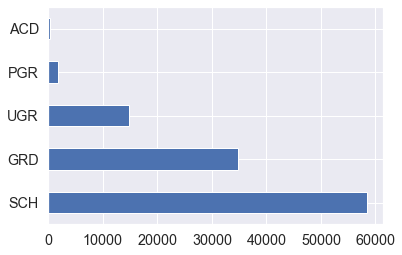

In [256]:
df.education.value_counts().plot.barh(), 
df.education.value_counts(), 

Постройте boxplot’ы для численных переменных и ответьте на следующие вопросы:

In [257]:
bin_cols = ['sex', 'car', 'car_type', 'foreign_passport', 'good_work']
cat_cols = ['education', 'home_address', 'work_address']
num_cols = ['age', 'decline_app_cnt', 'income', 'bki_request_cnt']

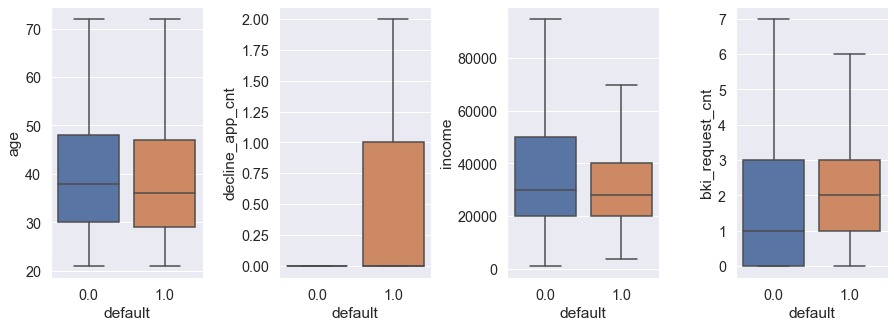

In [258]:
fig, axes = plt.subplots(1, 4, figsize = (15,5))
plt.subplots_adjust(wspace = 0.5)
axes = axes.flatten()

for i in range(len(num_cols)):
    sns.boxplot(x = 'default', y = num_cols[i], data = df, ax = axes[i], orient = 'v', showfliers = False)
    plt.xticks()

In [259]:
df.corr().min()

client_id         -0.061653
age               -0.111454
decline_app_cnt   -0.111454
good_work         -0.072233
score_bki         -0.104682
bki_request_cnt   -0.027428
region_rating     -0.089147
home_address      -0.058430
work_address      -0.062266
income            -0.090882
sna               -0.526594
first_time        -0.526594
default           -0.105579
dtype: float64

<AxesSubplot:>

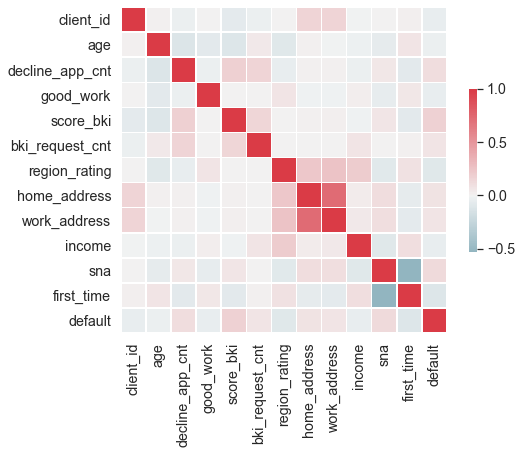

In [260]:
corr = df.corr()
f, ax = plt.subplots(figsize=(8, 6))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, center=0., square=True, linewidths=.5, cbar_kws={"shrink": .5})

<AxesSubplot:>

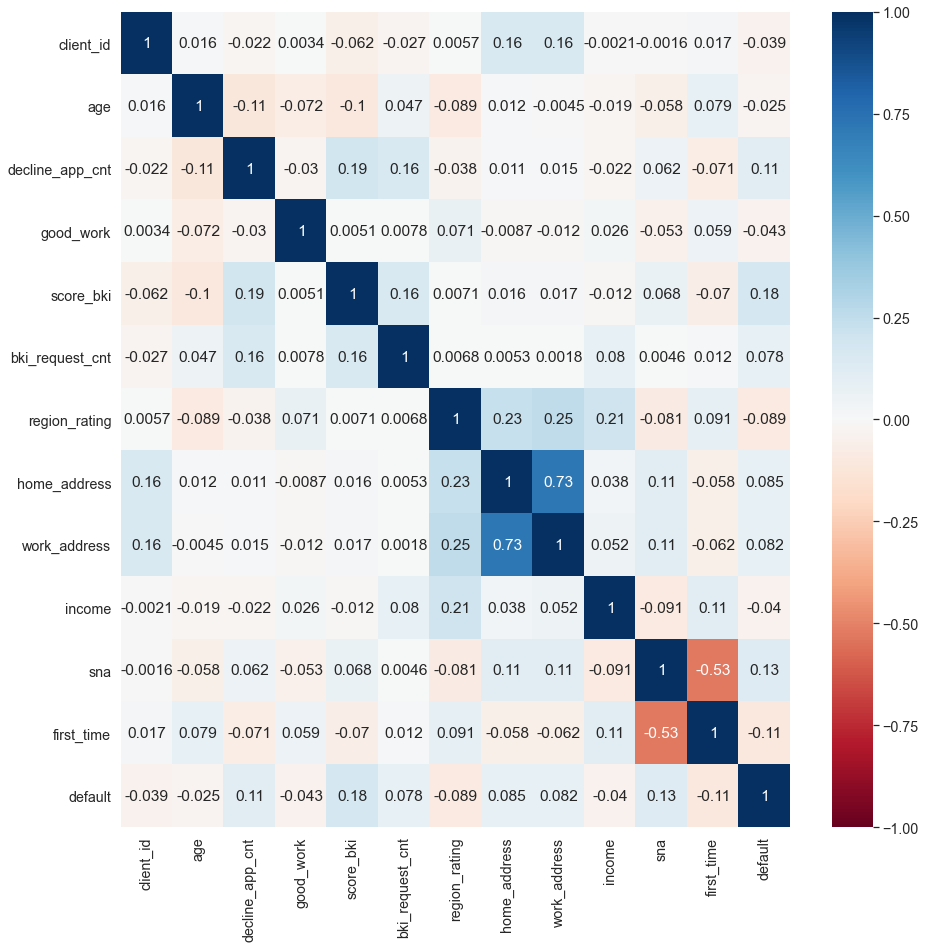

In [261]:
corrMatrix = df.corr()
plt.subplots(figsize=(15, 15))
sns.set(font_scale=1.3)
sns.heatmap(corrMatrix, annot=True, cmap="RdBu", 
           vmin=-1,vmax=1,center=0)

In [262]:
imp_num = Series(f_classif(df[num_cols], df['default'])[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [165]:
label_encoder = LabelEncoder()

mapped_education = pd.Series(label_encoder.fit_transform(df['sex']))
print(dict(enumerate(label_encoder.classes_)))

{0: 'F', 1: 'M'}


In [268]:
label_encoder = LabelEncoder()
for column in bin_cols:
    df[column] = label_encoder.fit_transform(df[column])

In [269]:
df.head()

,client_id,app_date,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,...,education_GRD,education_PGR,education_SCH,education_UGR,home_address_1,home_address_2,home_address_3,work_address_1,work_address_2,work_address_3
0,25905,01FEB2014,1,62,1,1,0,0,-2.008753,1,...,0,0,1,0,1,0,0,0,1,0
1,63161,12MAR2014,0,59,0,0,0,0,-1.532276,3,...,0,0,1,0,0,1,0,0,0,1
2,25887,01FEB2014,1,25,1,0,2,0,-1.408142,1,...,0,0,1,0,1,0,0,0,1,0
3,16222,23JAN2014,0,53,0,0,0,0,-2.057471,2,...,0,0,1,0,0,1,0,0,0,1
4,101655,18APR2014,1,48,0,0,0,1,-1.244723,1,...,1,0,0,0,0,1,0,0,0,1


In [266]:
df=pd.get_dummies(df, prefix=cat_cols, columns=cat_cols)

In [267]:
df.head()

,client_id,app_date,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,...,education_GRD,education_PGR,education_SCH,education_UGR,home_address_1,home_address_2,home_address_3,work_address_1,work_address_2,work_address_3
0,25905,01FEB2014,M,62,Y,Y,0,0,-2.008753,1,...,0,0,1,0,1,0,0,0,1,0
1,63161,12MAR2014,F,59,N,N,0,0,-1.532276,3,...,0,0,1,0,0,1,0,0,0,1
2,25887,01FEB2014,M,25,Y,N,2,0,-1.408142,1,...,0,0,1,0,1,0,0,0,1,0
3,16222,23JAN2014,F,53,N,N,0,0,-2.057471,2,...,0,0,1,0,0,1,0,0,0,1
4,101655,18APR2014,M,48,N,N,0,1,-1.244723,1,...,1,0,0,0,0,1,0,0,0,1


<AxesSubplot:>

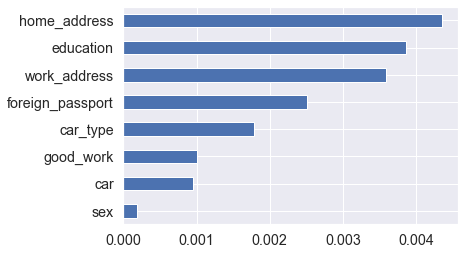

In [176]:
imp_cat = Series(mutual_info_classif(df[bin_cols + cat_cols], df['default'],
                                     discrete_features =True), index = bin_cols + cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

In [186]:
X_cat = OneHotEncoder(sparse = False).fit_transform(df[cat_cols].values)

In [271]:
df[num_cols] = StandardScaler().fit_transform(df[num_cols].values)

In [272]:
df.drop(['app_date', 'def', 'nondef'], axis=1, inplace=True)

KeyError: "['def' 'nondef'] not found in axis"

In [191]:
X = np.hstack([X_num, df[bin_cols].values, X_cat])
Y = df['default'].values

In [193]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [240]:
len(X_train) + len(X_test)

73799

In [248]:
len(y_test)

14760

# Обучите модель на стандартных настройках логистической регрессии.

In [194]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\gorba\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [197]:
Y_predicted = model.predict(X_test)
print(accuracy_score(y_test,Y_predicted))
print(precision_score(y_test,Y_predicted))
print(recall_score(y_test,Y_predicted))
print(f1_score(y_test,Y_predicted))

0.875609756097561
0.3953488372093023
0.009304871373836891
0.01818181818181818


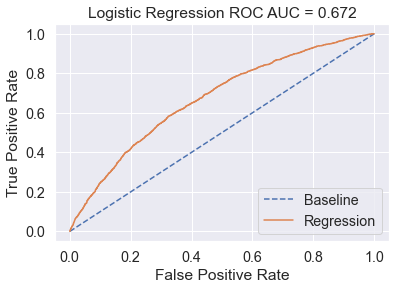

In [198]:
probs = model.predict_proba(X_test)
probs = probs[:,1]


fpr, tpr, threshold = roc_curve(y_test, probs)
roc_auc = roc_auc_score(y_test, probs)

plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label = 'Regression')
plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

## Давайте найдем оптимальное значение параметра регуляризации для логистической регрессии. 

In [199]:
from sklearn.model_selection import GridSearchCV

# Добавим типы регуляризации
penalty = ['l1', 'l2']

# Зададим ограничения для параметра регуляризации
C = np.logspace(0, 4, 10)

# Создадим гиперпараметры
hyperparameters = dict(C=C, penalty=penalty)

model = LogisticRegression()
model.fit(X_train, y_train)

# Создаем сетку поиска с использованием 5-кратной перекрестной проверки
clf = GridSearchCV(model, hyperparameters, cv=5, verbose=0)

best_model = clf.fit(X_train, y_train)

# View best hyperparameters
print('Лучшее Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Лучшее C:', best_model.best_estimator_.get_params()['C'])

C:\Users\gorba\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\gorba\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gorba\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gorba\anaconda3\lib\site-packa

C:\Users\gorba\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gorba\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gorba\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\gorba\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\gorba\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this trai

Лучшее Penalty: l2
Лучшее C: 1.0


C:\Users\gorba\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# Обучаем несколько моделей, генерируем результат и сравниваем с тестом

In [209]:

# KNeighborsClassifier:
alg_ngbh = KNeighborsClassifier(n_neighbors=3)
alg_ngbh.fit(X_train, y_train)
scores = cross_val_score(alg_ngbh, X_test, y_test, cv=5, scoring='roc_auc', n_jobs=-1)
print("roc_auc (k-neighbors): {}/{}".format(scores.mean(), scores.std()))

roc_auc (k-neighbors): 0.5482228541019741/0.012432925166455546


In [216]:
# GaussianNB:
alg_nbs = GaussianNB()
alg_nbs.fit(X_train, y_train)
scores = cross_val_score(alg_nbs, X_test, y_test, cv=5, scoring='roc_auc', n_jobs=-1)
print("roc_auc (naive bayes): {}/{}".format(scores.mean(), scores.std()))

roc_auc (naive bayes): 0.6504050485918731/0.010225902910881723


In [219]:
# LogisticRegression:
alg_log = LogisticRegression(random_state=RANDOM_SEED, max_iter=200)
alg_log.fit(X_train, y_train)
scores = cross_val_score(alg_log, X_test, y_test, cv=5, scoring='roc_auc', n_jobs=-1)
print("roc_auc (logistic regression): {}/{}".format(scores.mean(), scores.std()))

roc_auc (logistic regression): 0.6674230831063813/0.005052597353398372


In [273]:
# RandomForestClassifier:
alg_frst = RandomForestClassifier(random_state=RANDOM_SEED, n_estimators=500, min_samples_split=8, min_samples_leaf=2)
alg_frst.fit(X_train, y_train)
scores = cross_val_score(alg_frst, X_test, y_test, cv=5, scoring='roc_auc', n_jobs=-1)
print("roc_auc (random forest): {}/{}".format(scores.mean(), scores.std()))

roc_auc (random forest): 0.6350041847031489/0.006709844730784319


In [274]:
alg_gb = GradientBoostingClassifier(random_state=RANDOM_SEED)
alg_gb.fit(X_train, y_train)
scores = cross_val_score(alg_gb, X_test, y_test, cv=5, scoring='roc_auc', n_jobs=-1)
print("roc_auc (gradient boosting): {}/{}".format(scores.mean(), scores.std()))

roc_auc (gradient boosting): 0.6750132967359288/0.00868137252528087


In [222]:
alg_xgb = XGBClassifier(random_state=RANDOM_SEED)
alg_xgb.fit(X_train, y_train)
scores = cross_val_score(alg_xgb, X_test, y_test, cv=5, scoring='roc_auc', n_jobs=-1)
print("roc_auc (xg boosting): {}/{}".format(scores.mean(), scores.std()))

C:\Users\gorba\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:43:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
roc_auc (xg boosting): 0.6322040418186953/0.010119635083771337


In [226]:
alg_agb = AdaBoostClassifier(random_state=RANDOM_SEED)
alg_agb.fit(X_train, y_train)
scores = cross_val_score(alg_agb, X_test, y_test, cv=5, scoring='roc_auc', n_jobs=-1)
print("roc_auc (ada boosting): {}/{}".format(scores.mean(), scores.std()))

roc_auc (ada boosting): 0.671146605213719/0.005707823644142608


In [227]:
alg_comp = AdaBoostClassifier(base_estimator=LogisticRegression(random_state=RANDOM_SEED))
alg_comp.fit(X_train, y_train)
scores = cross_val_score(alg_comp, X_test, y_test, cv=5, scoring='roc_auc', n_jobs=-1)
print("roc_auc (comp boosting): {}/{}".format(scores.mean(), scores.std()))

roc_auc (comp boosting): 0.6684357632801309/0.005106823807450506


In [229]:
alg_lgbm = LGBMClassifier(random_state=RANDOM_SEED)
alg_lgbm.fit(X_train, y_train)
scores = cross_val_score(alg_lgbm, X_test, y_test, cv=5, scoring='roc_auc', n_jobs=-1)
print("roc_auc (lgbm): {}/{}".format(scores.mean(), scores.std()))

roc_auc (lgbm): 0.6537432698792959/0.0068435298397187165


## Оценка качества для лучшей модели

In [232]:
#Для градиентного бустинга:
y_pred_prob = alg_gb.predict_proba(X_test)[:,1]
y_pred = alg_gb.predict(X_test)
print('accuracy_score:', accuracy_score(y_test, y_pred))
print('balanced_accuracy_score:', balanced_accuracy_score(y_test, y_pred))
print('precision_score:', precision_score(y_test, y_pred))
print('recall_score:', recall_score(y_test, y_pred))
print('f1_score', f1_score(y_test, y_pred))
print('roc_auc_score', roc_auc_score(y_test, y_pred_prob))

accuracy_score: 0.8758807588075881
balanced_accuracy_score: 0.5005117317405849
precision_score: 0.2727272727272727
recall_score: 0.0016420361247947454
f1_score 0.0032644178454842216
roc_auc_score 0.6804462441285644


In [242]:
len(X_test)

14760

In [243]:
y_pred_prob = model.predict_proba(X)[:,1]
len(y_pred_prob)

73799

In [244]:
submit = pd.DataFrame(df.client_id)
submit['default']=y_pred_prob
submit.to_csv('submission.csv', index=False)